In [2]:
# Import dependencies
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import seaborn
from sklearn import preprocessing

# Pretty display for notebooks
%matplotlib inline

In [3]:
# Load the Census dataset
data = pd.read_csv("census2.csv")

# Success - Display the first record
display(data.head(n=5))
#display(data['education-num'].unique())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0


In [4]:
# Drop any rows that have Nan values (how: drop whole row)
data.dropna(how='all')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0
5,55,Self-emp-not-inc,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,0,34095,0,60,United-States,0
6,19,Private,10th,6,Never-married,Other-service,Other-relative,White,1,34095,0,24,United-States,0
7,46,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,1,27828,0,50,United-States,1
8,35,Private,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,0,27828,0,50,United-States,1
9,47,Self-emp-inc,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,0,27828,0,50,United-States,1


In [5]:
# compare the column names in data & test this is the real data CSV
list(data.columns.values)

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

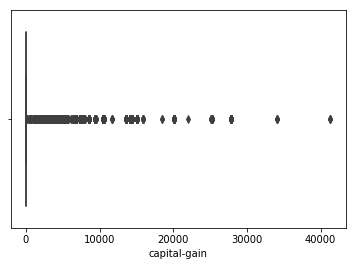

In [6]:
#making a box plot to show any outliers in the test data so we can get rid of it. 
#we're specifically looking for outliers in the "capital-gain" and "capital-loss" columns
#because they're skewing that data

#we already got rid of the outliers, those at or close to to 100K, so below you'll see max capital gain of slightly above 40K.

seaborn.boxplot(x=data['capital-gain'])

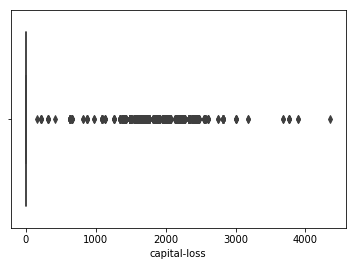

In [7]:
# Show outliers in "capital-loss"
#Again, we already got rid of capital loss outliers in Excel before importing.

seaborn.boxplot(x=data['capital-loss'])

In [8]:
#trying to get rid of outliers here?
def reject_outliers(test, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(test)]

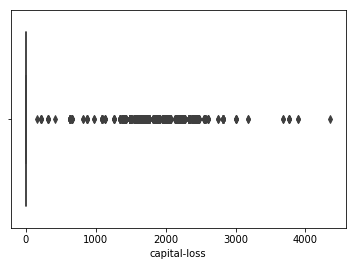

In [9]:
seaborn.boxplot(x=data['capital-loss'])

In [10]:
# Load the dataframe
df = pd.read_csv('census2.csv')
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0
5,55,Self-emp-not-inc,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,0,34095,0,60,United-States,0
6,19,Private,10th,6,Never-married,Other-service,Other-relative,White,1,34095,0,24,United-States,0
7,46,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,1,27828,0,50,United-States,1
8,35,Private,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,0,27828,0,50,United-States,1
9,47,Self-emp-inc,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,0,27828,0,50,United-States,1


In [11]:
#what data types are these?
data.dtypes

age                 int64
workclass          object
education_level    object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [12]:
#discretisation
data.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['divorced','married','married','married',
              'not married','not married','not married'], inplace = True)


In [13]:
#label Encoder
category_col =['workclass', 'race', 'education-num','marital-status', 'occupation',
               'relationship', 'sex', 'native-country', 'income'] 
labelEncoder = preprocessing.LabelEncoder()

In [14]:
# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in category_col:
    data[col] = labelEncoder.fit_transform(data[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'workclass': {' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}, 'race': {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}, 'education-num': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}, 'relationship': {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}, 'sex': {0: 

In [15]:
#if we wanted to grab data from only certain columns, we would use the below text: 
#data[['age','workclass', 'education_level']].head

In [16]:
data.dtypes

age                 int64
workclass           int64
education_level    object
education-num       int64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country      int64
income              int64
dtype: object

In [17]:
#output all this cleaning to a CSV
data.to_csv('donation_cleaned.csv')

In [37]:
#Starting the logistical regression, but using the CSV that the gents normalized.

In [38]:
#Logitical Regression
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [39]:
#read in our CSV
data = pd.read_csv(os.path.join("cleaned_census_1.csv"))
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,2,13,1,2,4,4,0,41310,0,24,25,0
1,63,4,12,14,2,4,4,0,41310,0,50,38,0
2,36,4,11,9,2,3,1,0,41310,0,90,34,0
3,18,2,11,9,4,10,4,0,34095,0,3,38,0
4,19,2,11,9,4,7,4,1,34095,0,20,38,0


In [40]:
# Assign X (data) and y (target)
X = data.drop("age", axis=1)
y = data["income"]
print(X.shape, y.shape)


(44993, 12) (44993,)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
classifier.fit(X_train, y_train)

/anaconda3/envs/CWRU/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
#print training score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [45]:
#make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 1 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [46]:
 pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [47]:
#try this with other variables:
# Assign X (data) and y (target)
X = data.drop("education_level", axis=1)
y = data["marital-status"]
print(X.shape, y.shape)


(44993, 12) (44993,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
classifier.fit(X_train, y_train)

/anaconda3/envs/CWRU/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/CWRU/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9143551446183025
Testing Data Score: 0.9138590096897502


In [53]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [2 4 2 4 0 0 0 2 4 2]
First 10 Actual labels: [2, 4, 2, 4, 0, 0, 0, 2, 4, 2]


In [54]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True) 

,Prediction,Actual
0,2,2
1,4,4
2,2,2
3,4,4
4,0,0
5,0,0
6,0,0
7,2,2
8,4,4
9,2,2


In [55]:
#try this with other variables:
# Assign X (data) and y (target)
X = data.drop("race", axis=1)
y = data["income"]
print(X.shape, y.shape)

(44993, 12) (44993,)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
#fit the model
classifier.fit(X_train, y_train)

/anaconda3/envs/CWRU/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
#print the scores
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [61]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 1 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [62]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True) 

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
